[0]


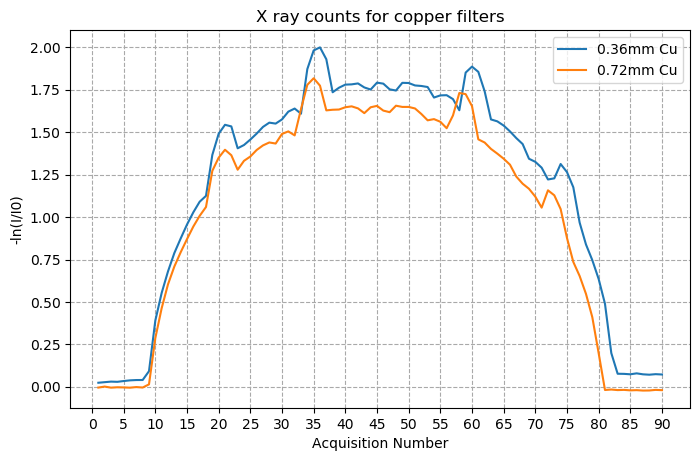

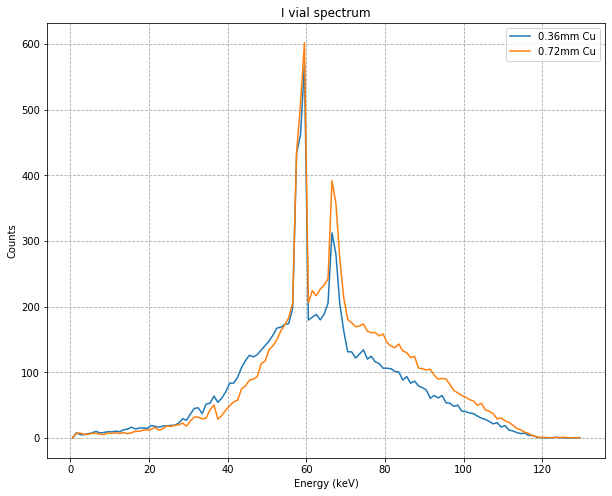

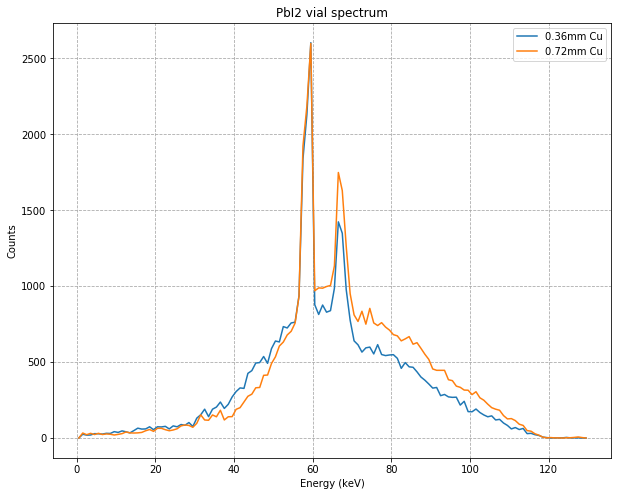

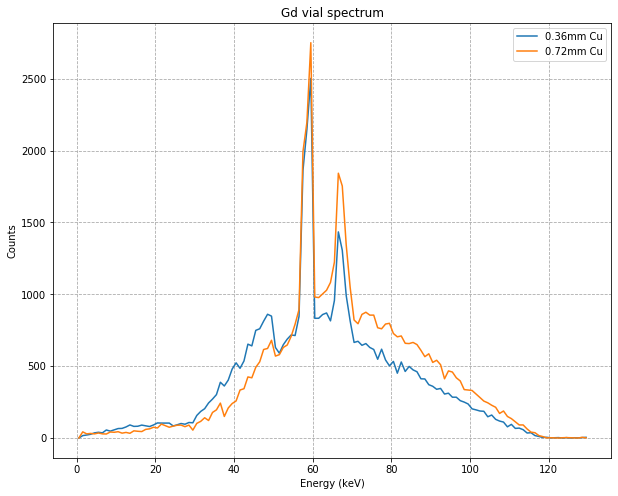

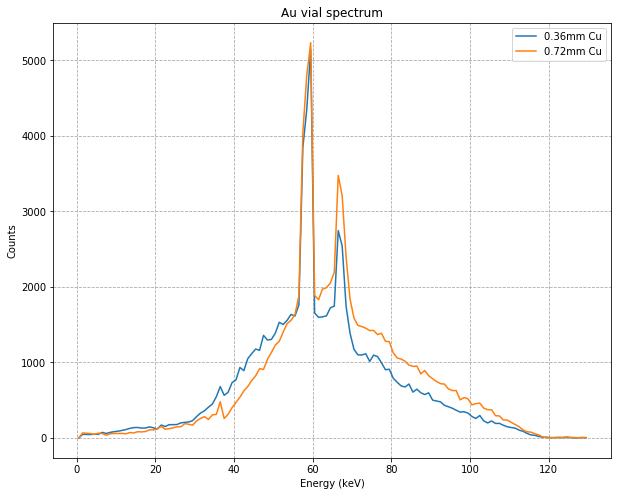

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from matplotlib.pyplot import figure
from skimage.transform import iradon
import matplotlib
import astra

bin_width=120
bins=np.arange(0,120,bin_width)
print(bins)


airscan_36mmCu= [sum(genfromtxt("Desktop/CT imaging/21-6-2021/0.36mm_Cu_airscan.mca", skip_header=int(round(i*550/81+16)),max_rows=int(round(bin_width*550/81)))) for i in bins]
airscan_72mmCu= [sum(genfromtxt("Desktop/CT imaging/21-6-2021/0.72mm_Cu_airscan.mca", skip_header=int(round(i*550/81+16)),max_rows=int(round(bin_width*550/81)))) for i in bins]

Cu_36mm= []
avg_counts=[]
for k in np.arange(0,len(bins)):
    for i in np.arange(1,91):
        counts = genfromtxt("Desktop/CT imaging/21-6-2021/0.36mm_Cu_acq{:02d}.mca".format(i), skip_header=int(round(bins[k]*550/81+16)),max_rows=int(round(bin_width*550/81)))
        avg_counts.append(-np.log(sum(counts)/airscan_36mmCu[k]))
        counts=0
    Cu_36mm.append(avg_counts)
    avg_counts=[]
    
Cu_72mm= []
for k in np.arange(0,len(bins)):
    for i in np.arange(1,91):
        counts = genfromtxt("Desktop/CT imaging/21-6-2021/0.72mm_Cu_acq{:02d}.mca".format(i), skip_header=int(round(bins[k]*550/81+16)),max_rows=int(round(bin_width*550/81)))
        avg_counts.append(-np.log(sum(counts)/airscan_72mmCu[k]))
        counts=0
    Cu_72mm.append(avg_counts)
    avg_counts=[]
    
    
    
x= np.arange(1,91)

figure(1,figsize=(8, 5), dpi=100)
plt.plot(x,Cu_36mm[0],label='0.36mm Cu')
plt.plot(x,Cu_72mm[0],label='0.72mm Cu')
plt.legend()
plt.xlabel('Acquisition Number')
plt.ylabel('-ln(I/I0)')
plt.title('X ray counts for copper filters')
plt.grid(color='darkgrey',linestyle='--')
plt.locator_params(axis="x", nbins=35)


bin_width=1
bins=np.arange(0,130,bin_width)


#First vial
counts_36mmCu = np.array([sum(genfromtxt("Desktop/CT imaging/21-6-2021/0.36mm_Cu_acq22.mca", skip_header=int(round(bins[i]*550/81+16)),max_rows=int(round(bin_width*550/81))))/int(round(bin_width*550/81)) for i in np.arange(0,len(bins))])
counts_72mmCu= np.array([sum(genfromtxt("Desktop/CT imaging/21-6-2021/0.72mm_Cu_acq22.mca", skip_header=int(round(bins[i]*550/81+16)),max_rows=int(round(bin_width*550/81))))/int(round(bin_width*550/81)) for i in np.arange(0,len(bins))])


figure(2,figsize=(10,8))
plt.plot(bins+bin_width/2,counts_36mmCu,label='0.36mm Cu')
plt.plot(bins+bin_width/2,counts_72mmCu,label='0.72mm Cu')
plt.title('I vial spectrum')
plt.grid(color='darkgrey',linestyle='--')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend()

#Second vial
counts_36mmCu = np.array([sum(genfromtxt("Desktop/CT imaging/21-6-2021/0.36mm_Cu_acq35.mca", skip_header=int(round(bins[i]*550/81+16)),max_rows=int(round(bin_width*550/81))))/bin_width for i in np.arange(0,len(bins))])
counts_72mmCu = np.array([sum(genfromtxt("Desktop/CT imaging/21-6-2021/0.72mm_Cu_acq35.mca", skip_header=int(round(bins[i]*550/81+16)),max_rows=int(round(bin_width*550/81))))/bin_width for i in np.arange(0,len(bins))])


figure(3,figsize=(10,8))
plt.plot(bins+bin_width/2,(counts_36mmCu),label='0.36mm Cu')
plt.plot(bins+bin_width/2,(counts_72mmCu),label='0.72mm Cu')
plt.title('PbI2 vial spectrum')
plt.grid(color='darkgrey',linestyle='--')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend()

#Third vial
counts_36mmCu = np.array([sum(genfromtxt("Desktop/CT imaging/21-6-2021/0.36mm_Cu_acq60.mca", skip_header=int(round(bins[i]*550/81+16)),max_rows=int(round(bin_width*550/81))))/bin_width for i in np.arange(0,len(bins))])
counts_72mmCu = np.array([sum(genfromtxt("Desktop/CT imaging/21-6-2021/0.72mm_Cu_acq58.mca", skip_header=int(round(bins[i]*550/81+16)),max_rows=int(round(bin_width*550/81))))/bin_width for i in np.arange(0,len(bins))])


figure(4,figsize=(10,8))
plt.plot(bins+bin_width/2,(counts_36mmCu),label='0.36mm Cu')
plt.plot(bins+bin_width/2,(counts_72mmCu),label='0.72mm Cu')
plt.title('Gd vial spectrum')
plt.grid(color='darkgrey',linestyle='--')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend()

#Fourth vial
counts_36mmCu = np.array([sum(genfromtxt("Desktop/CT imaging/21-6-2021/0.36mm_Cu_acq74.mca", skip_header=int(round(bins[i]*550/81+16)),max_rows=int(round(bin_width*550/81))))/bin_width for i in np.arange(0,len(bins))])
counts_72mmCu = np.array([sum(genfromtxt("Desktop/CT imaging/21-6-2021/0.72mm_Cu_acq72.mca", skip_header=int(round(bins[i]*550/81+16)),max_rows=int(round(bin_width*550/81))))/bin_width for i in np.arange(0,len(bins))])


figure(5,figsize=(10,8))
plt.plot(bins+bin_width/2,(counts_36mmCu),label='0.36mm Cu')
plt.plot(bins+bin_width/2,(counts_72mmCu),label='0.72mm Cu')
plt.title('Au vial spectrum')
plt.grid(color='darkgrey',linestyle='--')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend()
